In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [3]:
X_train =  np.array([[34.62365962, 78.02469282],
             [32.28671077 ,43.89499752],
             [35.84740877, 70.90219803],
             [61.18259939, 86.3085521 ],
             [79.03273605, 75.34437644],
             [74.62365962, 58.02469282],
             [30.28671077, 43.89499752],
             [35.84740877, 72.90219803],
             [70.18259939, 88.3085521 ],
             [79.03273605, 95.34437644]])

y_train =  np.array([0., 0., 0., 1., 1., 0., 0., 0., 1., 1.])


In [4]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [32.28671077 43.89499752]
 [35.84740877 70.90219803]
 [61.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [5]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [6]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (10, 2)
The shape of y_train is: (10,)
We have m = 10 training examples


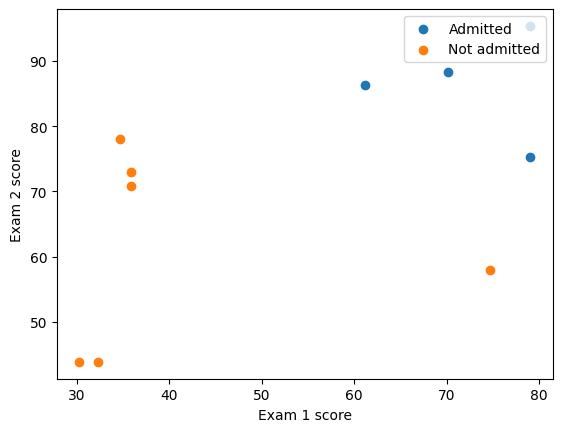

In [7]:
pos = y_train == 1
neg = y_train == 0

# Plot examples
plt.scatter(X_train[pos, 0], X_train[pos, 1], label="Admitted")
plt.scatter(X_train[neg, 0], X_train[neg, 1], label="Not admitted")

# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

In [8]:
# UNQ_C1
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
    
    
    return g

In [9]:
# Note: You can edit this value
value = 0

print (f"sigmoid({value}) = {sigmoid(value)}")

sigmoid(0) = 0.5


In [10]:
# UNQ_C2
# GRADED FUNCTION: compute_cost
import math

def compute_cost(X, y, w, b, *argv):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns:
      total_cost : (scalar) cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    total_cost = 0
    
    for i in range(m):
        x = X[i]
        fwb_xi = sigmoid(np.dot(w, x) + b)
        
        # Clip the output of the sigmoid function to prevent log domain errors
        fwb_xi = np.clip(fwb_xi, 1e-10, 1 - 1e-10)
        
        total_cost += -y[i] * math.log(fwb_xi) - (1 - y[i]) * math.log(1 - fwb_xi)

    total_cost = (1 / m) * total_cost
    return total_cost

In [11]:
m, n = X_train.shape

# Compute and display cost with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w and b (zeros): {:.3f}'.format(cost))

Cost at initial w and b (zeros): 0.693


In [12]:
# UNQ_C3
# GRADED FUNCTION: compute_gradient
def compute_gradient(X, y, w, b, *argv): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      *argv : unused, for compatibility with regularized version below
    Returns
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        x = X[i]
        for j in range(n):
            dj_dw[j] += (sigmoid(np.dot(w,x)+b)-y[i])*X[i,j]
        dj_db += (sigmoid(np.dot(w,x)+b)-y[i])
    
    dj_db = dj_db * (1/m)
    dj_dw = dj_dw * (1/m)

    
    ### END CODE HERE ###

        
    return dj_db, dj_dw

In [13]:
# Compute and display gradient with w and b initialized to zeros
initial_w = np.zeros(n)
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w and b (zeros):{dj_db}' )
print(f'dj_dw at initial w and b (zeros):{dj_dw.tolist()}' )

dj_db at initial w and b (zeros):0.1
dj_dw at initial w and b (zeros):[-2.2957556279999998, 1.1168959829999978]


In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value 
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant
      
    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [15]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8

# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     1.15   
Iteration 1000: Cost     0.23   
Iteration 2000: Cost     0.22   
Iteration 3000: Cost     0.22   
Iteration 4000: Cost     0.22   
Iteration 5000: Cost     0.22   
Iteration 6000: Cost     0.22   
Iteration 7000: Cost     0.22   
Iteration 8000: Cost     0.22   
Iteration 9000: Cost     0.22   
Iteration 9999: Cost     0.22   


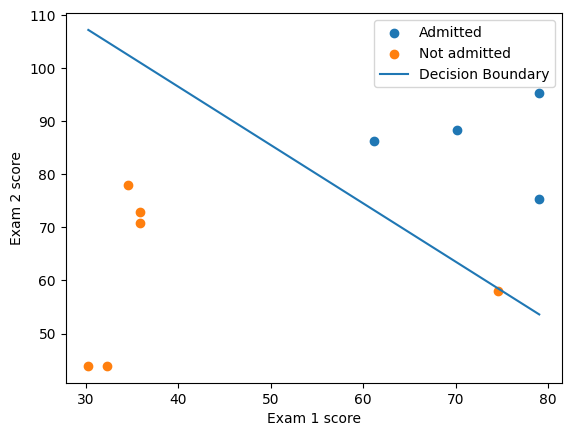

In [16]:
def plot_decision_boundary(w, b, X, y):
    # Separate positive (admitted) and negative (not admitted) examples
    pos = y == 1
    neg = y == 0

    # Plot examples
    plt.scatter(X[pos, 0], X[pos, 1], label="Admitted")
    plt.scatter(X[neg, 0], X[neg, 1], label="Not admitted")

    # Generate the decision boundary line
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = -(w[0] * x_values + b) / w[1]

    # Plot the decision boundary line
    plt.plot(x_values, y_values, label="Decision Boundary")

# Assuming you have X_train (exam scores) and y_train (admitted or not admitted) data available
# And w (weights) and b (bias) for the decision boundary

plot_decision_boundary(w, b, X_train, y_train)

# Set the y-axis label
plt.ylabel('Exam 2 score')
# Set the x-axis label
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()


In [17]:
# UNQ_C4
# GRADED FUNCTION: predict

def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        x = X[i]
        fwb_x = sigmoid(np.dot(w,x)+b)
        if fwb_x > 0.5:
            p[i] = 1
        else:
            p[i] = 0
        
    ### END CODE HERE ### 
    return p

In [18]:
#Compute accuracy on our training set
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 100.000000


In [34]:
# REGULARIZED
X_train =  np.array( [[0.051267,  0.69956 ],
                     [-0.092742,  0.38494 ],
                     [-0.21371,   0.69225 ],
                     [-0.375,     0.50219 ],
                     [-0.1325,   0.46564 ],
                     [ 0.051267,  0.29956 ],
                     [-0.092742,  0.18494 ],
                     [-0.31371,   0.39225 ],
                     [-0.375,     0.70219 ],
                     [-0.21325,   0.46564 ],
                     [-0.52040816,  0.87346939],
                     [ 0.7244898, -0.80408163],
                     [-0.69387755, -0.64897959],
                     [ 0.71428571,  0.90612245],
                     [-0.96938776, -0.7877551 ],
                     [ 0.70408163,  0.80816327],
                     [-0.78571429,  0.92244898],
                     [-0.6,        -0.66530612],
                     [ 0.57142857,  0.93061224],
                     [-0.96938776, -0.87755102]])

y_train =  np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [35]:
# UNQ_C5
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 

    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###
    for j in range(n):
        reg_cost += w[j]**2

        
    reg_cost = (lambda_/(2*m)) * reg_cost
    
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [36]:
# UNQ_C6
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for logistic regression with regularization
 
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value 
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ###     
    for j in range(n):
        dj_dw[j] += (lambda_/m) * w[j]
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw

In [37]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Define the map_feature function using PolynomialFeatures
def map_feature(X1, X2, degree=6):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(np.column_stack((X1, X2)))

# Normalize features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)

# Initialize fitting parameters
X_mapped = map_feature(X_train_norm[:, 0], X_train_norm[:, 1])

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) * 0.01  # Initialize weights with smaller values
initial_b = 0.  # Initialize bias to 0

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 0.01

# Some gradient descent settings
iterations = 10000
alpha = 0.001  # Reduce the learning rate

# Assuming you have gradient_descent and other required functions defined

w, b, J_history, _ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                      compute_cost_reg, compute_gradient_reg,
                                      alpha, iterations, lambda_)


Iteration    0: Cost     0.73   
Iteration 1000: Cost     0.32   
Iteration 2000: Cost     0.26   
Iteration 3000: Cost     0.22   
Iteration 4000: Cost     0.19   
Iteration 5000: Cost     0.17   
Iteration 6000: Cost     0.15   
Iteration 7000: Cost     0.14   
Iteration 8000: Cost     0.13   
Iteration 9000: Cost     0.12   
Iteration 9999: Cost     0.11   


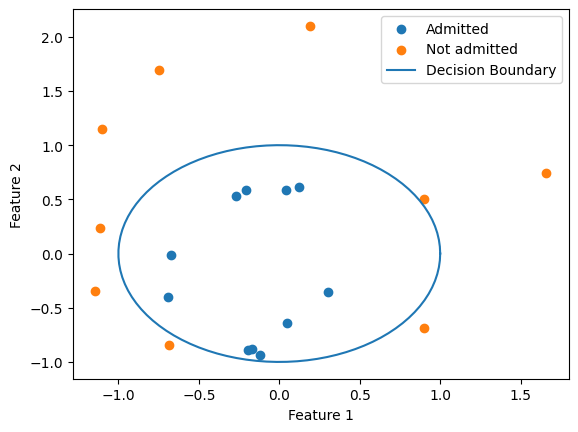

In [39]:
def plot_decision_boundary(center, radius, X, y):
    # Separate positive (admitted) and negative (not admitted) examples
    pos = y == 1
    neg = y == 0

    # Plot examples
    plt.scatter(X[pos, 0], X[pos, 1], label="Admitted")
    plt.scatter(X[neg, 0], X[neg, 1], label="Not admitted")

    # Generate the circular decision boundary
    theta = np.linspace(0, 2 * np.pi, 100)
    x_values = center[0] + radius * np.cos(theta)
    y_values = center[1] + radius * np.sin(theta)

    # Plot the decision boundary circle
    plt.plot(x_values, y_values, label="Decision Boundary")

# Assuming you have X (exam scores) and y (admitted or not admitted) data available
# And center and radius for the decision boundary
X = np.random.randn(20, 2)
y = (X[:, 0]**2 + X[:, 1]**2) < 1
center = (0, 0)
radius = 1

plot_decision_boundary(center, radius, X, y)

# Set the y-axis label
plt.ylabel('Feature 2')
# Set the x-axis label
plt.xlabel('Feature 1')
plt.legend(loc="upper right")
plt.show()
